In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn 
import gseapy as gp
from gseapy import barplot, dotplot

In [2]:
dtis = pd.read_csv('/mnt/c/Users/natha/Documents/tkgdti_top1000_results.csv')
dtis.head()

background = dtis.target.unique().tolist()

In [ ]:
ven = dtis[lambda x: (x.inhibitor == 'Venetoclax') & ~x.in_targetome_extended]
ven.head()

,target,negatives,gnn_ens_score,inhibitor,in_targetome_extended,assay_value,cpx_ens_score,gnn_global_rank,cpx_global_rank,gnn_drug_rank,cpx_drug_rank,ven_mid_lfc,ven_mid_pval,ven_tiers
9,BAX,True,0.057743,Venetoclax,False,NaN,0.663444,10,9742,1.0,5.0,0.966705,0.000049,Unassigned
55,BAK1,True,0.032730,Venetoclax,False,NaN,0.645328,56,3313,2.0,8.0,2.094411,0.000006,Tier3
613,KCNH2,True,0.011771,Venetoclax,False,NaN,0.563929,614,12465,3.0,139.0,-0.402109,0.212730,Unassigned
1030,BBC3,True,0.008758,Venetoclax,False,NaN,0.640528,1031,4995,4.0,9.0,1.372171,0.000196,Unassigned
2128,CYCS,True,0.005597,Venetoclax,False,NaN,0.573792,2129,3506,5.0,94.0,NaN,NaN,Unassigned


In [5]:
gene_list_gnn = ven[lambda x: x.gnn_drug_rank < 100].target.values.tolist() 

enr_gnn = gp.enrichr(gene_list=gene_list_gnn,
                 gene_sets=['Reactome_Pathways_2024'],
                 # organism='human', # organism argment is ignored because user input a background
                 background=background,
                 outdir=None, # don't write to disk
                )

gene_list_cpx = ven[lambda x: x.cpx_drug_rank < 100].target.values.tolist() 

enr_cpx = gp.enrichr(gene_list=gene_list_cpx,
                 gene_sets=['Reactome_Pathways_2024'],
                 # organism='human', # organism argment is ignored because user input a background
                 background=background,
                 outdir=None, # don't write to disk
                )


In [ ]:
res = enr_gnn.res2d.merge(enr_cpx.res2d, on='Term', how='outer', suffixes=('_gnn', '_cpx'))  
res.head()

,Gene_set_gnn,Term,P-value_gnn,Adjusted P-value_gnn,Old P-value_gnn,Old adjusted P-value_gnn,Odds Ratio_gnn,Combined Score_gnn,Genes_gnn,Gene_set_cpx,P-value_cpx,Adjusted P-value_cpx,Old P-value_cpx,Old adjusted P-value_cpx,Odds Ratio_cpx,Combined Score_cpx,Genes_cpx
0,Reactome_Pathways_2024,ADORA2B Mediated Anti-Inflammatory Cytokines P...,0.399805,0.547654,0.0,0.0,2.010937,1.843585,PRKACG,Reactome_Pathways_2024,0.063592,0.121568,0.0,0.0,5.155511,14.204773,PRKACA;GNAI2
1,NaN,ADP Signalling Through P2Y Purinoceptor 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reactome_Pathways_2024,0.199537,0.259462,0.0,0.0,4.736874,7.634679,SRC
2,NaN,ADP Signalling Through P2Y Purinoceptor 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reactome_Pathways_2024,0.191387,0.251273,0.0,0.0,4.974359,8.224889,GNAI2
3,NaN,AKT Phosphorylates Targets in the Cytosol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reactome_Pathways_2024,0.000329,0.002432,0.0,0.0,27.879187,223.611271,GSK3B;CHUK;AKT1
4,NaN,AKT Phosphorylates Targets in the Nucleus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reactome_Pathways_2024,0.086958,0.144457,0.0,0.0,12.455128,30.419517,AKT1


p-val corr:  0.40469733442286965


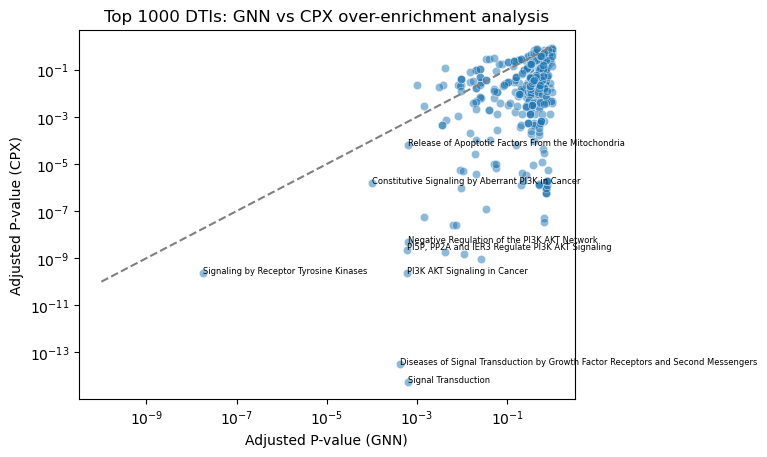

In [18]:
print('p-val corr: ', res['P-value_gnn'].corr(res['P-value_cpx']))

plt.figure()
sbn.scatterplot(data=res, x='Adjusted P-value_gnn', y='Adjusted P-value_cpx', alpha=0.5)
plt.plot((1e-10, 1), (1e-10, 1), color='gray', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Adjusted P-value (GNN)')
plt.ylabel('Adjusted P-value (CPX)')
plt.title('Top 1000 DTIs: GNN vs CPX over-enrichment analysis')

# label the outliers with the `Term` value (text)
a = 1e-3
for i, row in res.iterrows():
    if row['Adjusted P-value_gnn'] < a and row['Adjusted P-value_cpx'] < a:
        plt.text(row['Adjusted P-value_gnn'], row['Adjusted P-value_cpx'], row['Term'], fontsize=6)

plt.show()

In [ ]:
res[lambda x: x.Term == 'Release of Apoptotic Factors From the Mitochondria'].head() # involved DTIs: BAX;CYCS;BAK1

,Gene_set_gnn,Term,P-value_gnn,Adjusted P-value_gnn,Old P-value_gnn,Old adjusted P-value_gnn,Odds Ratio_gnn,Combined Score_gnn,Genes_gnn,Gene_set_cpx,P-value_cpx,Adjusted P-value_cpx,Old P-value_cpx,Old adjusted P-value_cpx,Odds Ratio_cpx,Combined Score_cpx,Genes_cpx
668,Reactome_Pathways_2024,Release of Apoptotic Factors From the Mitochon...,0.000007,0.00064,0.0,0.0,247.691489,2932.100863,BAX;CYCS;BAK1,Reactome_Pathways_2024,0.000004,0.000065,0.0,0.0,307.065789,3825.721013,BAX;CYCS;BAK1
